# Data Exploration

In this notebook, we are going to use the [Kaggle competition](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) dataset on estimating property sales prices in Melbourne, Australia.

We will use the reduced dataset produced by [DanB](https://www.kaggle.com/dansbecker).

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [2]:
melb_df = pandas.read_csv('../data/melb_data.csv')
melb_df[:3]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Representation of the examples

The task we will focus on is **estimating the price of a property**, knowing the rest of its characteristics.

The first step in any analysis is to perform an exploration of the data and analyze the distributions of its variables. That is, apply the tools that we have studied during the previous subject, **Data Visualization**. For this reason, we will not go into details in this notebook, but it's key that this process is always done in data science.

<AxesSubplot:xlabel='Price', ylabel='Count'>

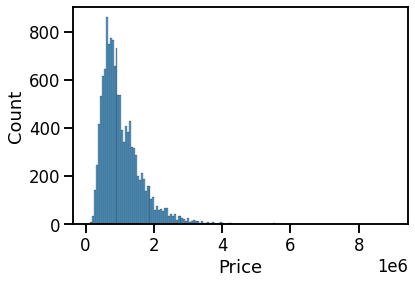

In [3]:
seaborn.histplot(melb_df.Price.dropna())

After we have a rough idea of the shape and meaning of each of the variables in our data set, we need to start thinking about how useful they are for my particular prediction task.

## Dates

The dates represent the variable *time*, which is not trivial to represent in the dataset.

* How does the weather affect the phenomenon I want to study?
* Is it important absolutely or relatively?
* To what level of precision (or to what scale) is it relevant? Years, days, minutes? Does the time zone matter?

In addition to these conceptual questions, we need to consider what (Python) data type these dates are represented with:

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

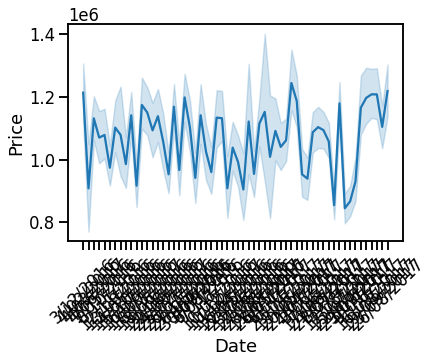

In [4]:
seaborn.lineplot(data=melb_df, x='Date', y='Price')
plt.xticks(rotation=45)

When reading the dataset, the dates were recognized as strings. We can change the data type to `datetime`, which is a data structure designed to work with dates down to millisecond precision.

In [5]:
melb_df['date'] = pandas.to_datetime(melb_df.Date)

/tmp/ipykernel_202608/1122853668.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  melb_df['date'] = pandas.to_datetime(melb_df.Date)


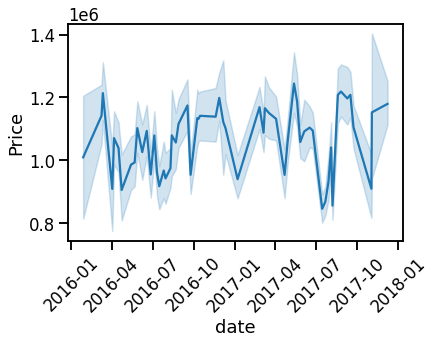

In [6]:
seaborn.lineplot(data=melb_df, x='date', y='Price')
plt.xticks(rotation=45);

We can consider that the day is not important for this data set, and that it is only contributing noise.

To extract just the month from a date, we apply a function to each row.

In [7]:
melb_df['date_month'] = pandas.to_datetime(melb_df.date.dt.strftime('%Y-%m'))

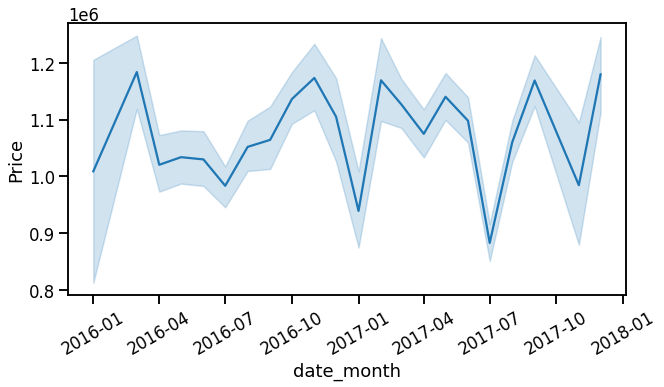

In [8]:
fig = plt.figure(figsize=(10, 5))
seaborn.lineplot(data=melb_df.sort_values('date_month'), x='date_month', y='Price')
plt.xticks(rotation=30);